# Part 1 - Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data from disk


In [17]:
df = pd.read_csv('../01_data\oneYearBTCUSD')
df.columns
df = df.rename(columns = {'Unnamed: 0':'Datetime'})
df['Datetime']=pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')
df.head()

,open,high,low,close,volume,Dividends,Stock Splits,adj_close
Datetime,,,,,,,,
2021-11-05 23:00:00+00:00,61151.617188,61151.617188,61151.617188,61151.617188,0.0,0.0,0.0,NaN
2021-11-05 23:01:00+00:00,61158.050781,61158.050781,61158.050781,61158.050781,0.0,0.0,0.0,NaN
2021-11-05 23:02:00+00:00,61151.449219,61151.449219,61151.449219,61151.449219,4077568.0,0.0,0.0,NaN
2021-11-05 23:03:00+00:00,61135.757812,61135.757812,61135.757812,61135.757812,0.0,0.0,0.0,NaN
2021-11-05 23:04:00+00:00,61066.847656,61066.847656,61066.847656,61066.847656,0.0,0.0,0.0,NaN


## 1.2.3 Bars


### Time bars


<AxesSubplot:xlabel='Datetime', ylabel='close'>

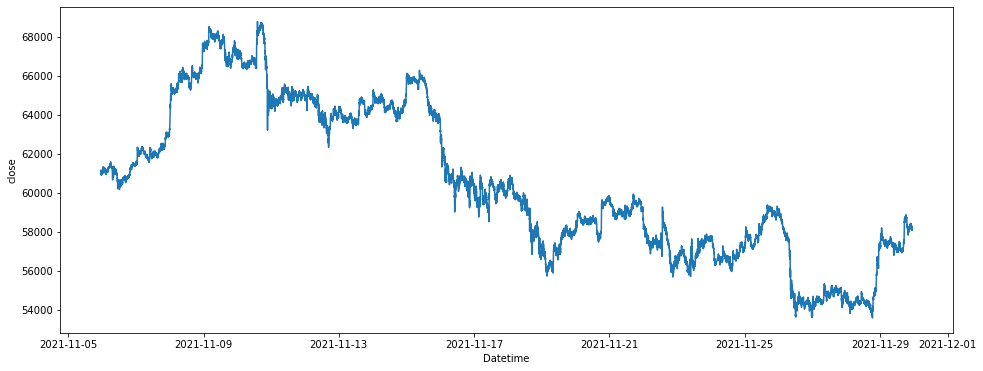

In [23]:
plt.figure(figsize=(16, 6))
sns.lineplot(data = df, x = df.index, y = "close")

### Volume Bars

We want to convert ticker bars on a one minute resulution as we got it from yahoo finance to volume bars and later on to dollar bars 

In [26]:
def compute_vwap(df):
    q = df['volume']
    p = df['close']
    vwap = p * q / q
    df['vwap'] = vwap
    return df
compute_vwap(df).head()

,open,high,low,close,volume,Dividends,Stock Splits,adj_close,vwap
Datetime,,,,,,,,,
2021-11-05 23:00:00+00:00,61151.617188,61151.617188,61151.617188,61151.617188,0.0,0.0,0.0,NaN,NaN
2021-11-05 23:01:00+00:00,61158.050781,61158.050781,61158.050781,61158.050781,0.0,0.0,0.0,NaN,NaN
2021-11-05 23:02:00+00:00,61151.449219,61151.449219,61151.449219,61151.449219,4077568.0,0.0,0.0,NaN,61151.449219
2021-11-05 23:03:00+00:00,61135.757812,61135.757812,61135.757812,61135.757812,0.0,0.0,0.0,NaN,NaN
2021-11-05 23:04:00+00:00,61066.847656,61066.847656,61066.847656,61066.847656,0.0,0.0,0.0,NaN,NaN


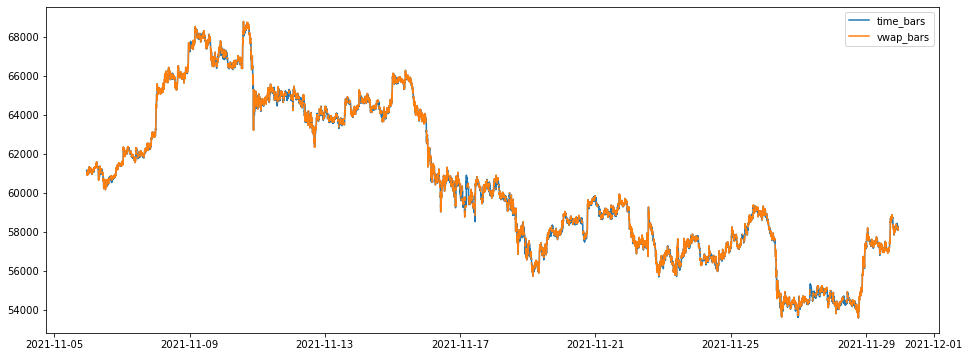

In [27]:
plt.figure(figsize=(16, 6))
# plot lines
plt.plot(df.index, df['close'], label = "time_bars")
plt.plot(df.index, df['vwap'], label = "vwap_bars")
plt.legend()
plt.show()

We want to convert ticker bars on a one minute resulution as we got it from yahoo finance to volume bars and later on to dollar bars 

In [28]:
def dd_bars(data: pd.DataFrame, m: int = None):
    '''
    params: data => dataframe of close series
    params: column => column of data sample; vol, dollar etc
    '''    
    ts, idx = 0, []
    for i, x in enumerate(data):
        ts += x
        if ts >= m:
            ts = 0; idx.append(i)
            continue
    return data.iloc[idx]

In [33]:
type(df['close'])

pandas.core.series.Series

In [36]:
# convert to dollars traded by multiplying the volumen times the dollar amount and then check the ticks
df['dollarVolume'] = df['close'] * df['volume']
dollarBars = dd_bars(df['dollarVolume'], m = 1000)

In [44]:
dollarBars[:5]

Datetime
2021-11-05 23:02:00+00:00    2.493492e+11
2021-11-05 23:07:00+00:00    5.660077e+10
2021-11-05 23:13:00+00:00    2.396851e+12
2021-11-05 23:14:00+00:00    5.962010e+11
2021-11-05 23:16:00+00:00    1.688947e+11
Name: dollarVolume, dtype: float64

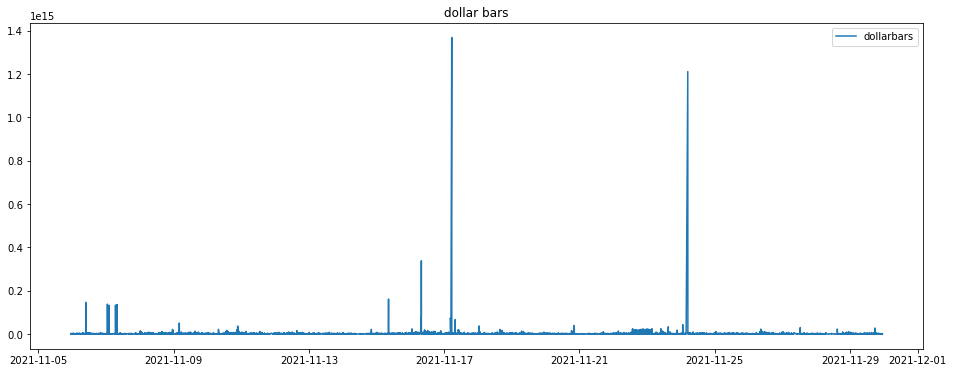

In [43]:
plt.figure(figsize=(16, 6))
# plot lines
# plt.plot(df.index, df['close'], label = "time_bars")
plt.plot(dollarBars.index, dollarBars, label = "dollarbars")
plt.title('dollar bars')
plt.legend()
plt.show()

In [62]:
def generate_dollarbars(trades, frequency=1000):
    times = trades['Datetime'].astype(str)
    prices = trades['close'].to_numpy()
    volumes = trades['volume'].to_numpy()
    ans = np.zeros(shape=(len(prices), 6))
    candle_counter = 0
    dollars = 0
    lasti = 0
    for i in range(len(prices)):
        dollars += volumes[i]*prices[i]
        if dollars >= frequency:
            ans[candle_counter][0] = times.iloc[i]                          # time
            ans[candle_counter][1] = prices[lasti]                     # open
            ans[candle_counter][2] = np.max(prices[lasti:i+1])         # high
            ans[candle_counter][3] = np.min(prices[lasti:i+1])         # low
            ans[candle_counter][4] = prices[i]                         # close
            ans[candle_counter][5] = np.sum(volumes[lasti:i+1])        # volume
            candle_counter += 1
            lasti = i+1
            dollars = 0
    return ans[:candle_counter]

In [63]:

df_test = df[['Datetime', 'close', 'volume']]

In [64]:
df_test.head()


,Datetime,close,volume
0,2021-11-05 23:00:00+00:00,61151.617188,0.0
1,2021-11-05 23:01:00+00:00,61158.050781,0.0
2,2021-11-05 23:02:00+00:00,61151.449219,4077568.0
3,2021-11-05 23:03:00+00:00,61135.757812,0.0
4,2021-11-05 23:04:00+00:00,61066.847656,0.0


In [65]:
dbars = generate_dollarbars(df_test)

ValueError: could not convert string to float: '2021-11-05 23:02:00+00:00'